# Gradient Descent: 1 parameter, $ \theta_1 $, or `m`
### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

### Data Generation

In [2]:
m      = 2
x      = np.arange(-5, 5)
y      = np.array([5*n + np.random.normal(0,1) for n in x])
guess  = m * x
losses = (y - (m*x)) ** 2
slopes = (y - (m*x)) * (-2*x)

### Basic Scatter

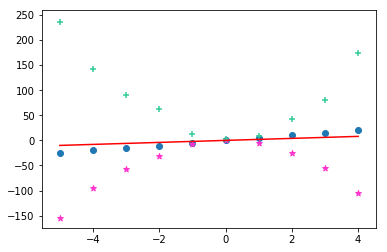

In [3]:
plt.scatter(x,y);
plt.plot(x,guess,c='red');
plt.scatter(x, slopes, c='#ff33cc', marker='*');
plt.scatter(x, losses, c='#33cc99', marker='+');

### Show mean gradients over a range of `m` values

In [4]:
for i in range(3, 7):
    s = (y - (i*x)) * (-2*x)
    print('coefficient:', i, 'total slope:', sum(s))

coefficient: 3 total slope: -366.1861777232949
coefficient: 4 total slope: -196.18617772329486
coefficient: 5 total slope: -26.18617772329489
coefficient: 6 total slope: 143.81382227670514


### Function that plots `mean squared error` over a range of $ \theta_1 $ values

In [5]:
def plotter(x, y, m_range):
    mses   = [((y - (m*x)) ** 2).mean()     for m in m_range]
    slopes = [((y - (m*x)) * (-2*x)).mean() for m in m_range]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax[0].scatter(m_range, mses)
    ax[0].plot(m_range, slopes, c='#ff33cc', marker='+')
    ax[0].set_xlabel('m')
    ax[0].set_ylabel('mse')
    ax[0].set_title('mse as a function of slope')

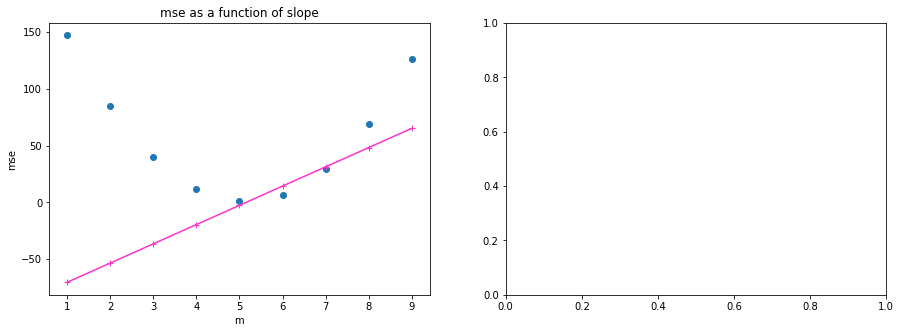

In [6]:
plotter(x, y, range(1, 10))

### Gradient Descent

In [7]:
m = 1
for e in range(20):
    # each epoch runs through full batch of 1 sample
    # compute loss, forward propagation
    mse = ((y - (m*x)) ** 2).mean()
    # average gradient for current `m`
    m_grad = ((y - (m*x)) * (-2*x)).mean()
    # compute the delta
    delta = 0.01 * m_grad
    # update `m`
    m -= delta
    
    print("m: {:.2f} mse: {:.2f} grad: {:.2f}".format(m, mse, m_grad))

m: 1.71 mse: 147.27 grad: -70.62
m: 2.29 mse: 101.64 grad: -58.61
m: 2.78 mse: 70.20 grad: -48.65
m: 3.18 mse: 48.55 grad: -40.38
m: 3.52 mse: 33.63 grad: -33.51
m: 3.80 mse: 23.35 grad: -27.82
m: 4.03 mse: 16.27 grad: -23.09
m: 4.22 mse: 11.39 grad: -19.16
m: 4.38 mse: 8.03 grad: -15.91
m: 4.51 mse: 5.72 grad: -13.20
m: 4.62 mse: 4.12 grad: -10.96
m: 4.71 mse: 3.02 grad: -9.09
m: 4.79 mse: 2.27 grad: -7.55
m: 4.85 mse: 1.75 grad: -6.27
m: 4.90 mse: 1.39 grad: -5.20
m: 4.94 mse: 1.14 grad: -4.32
m: 4.98 mse: 0.97 grad: -3.58
m: 5.01 mse: 0.85 grad: -2.97
m: 5.03 mse: 0.77 grad: -2.47
m: 5.05 mse: 0.71 grad: -2.05
